# Segmentation of a single ultrasound image


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

from seg_lib import dice_coef_np, selective_unet

plt.rcParams["figure.figsize"] = (15, 15)
plt.rc('font', size=12)

In [3]:
img = cv2.imread('data/example.png', 0) 
roi = cv2.imread('data/example_roi.png', 0)/255
img = np.expand_dims(img, 0)
img = np.expand_dims(img, 3)
print('image shape:', img.shape, 'roi shape:', roi.shape)

image shape: (1, 224, 224, 1) roi shape: (224, 224)


[SK-U-Net weights](https://drive.google.com/file/d/1cVEAcoyA5wLHxoCtOAIX2bKusxJsBvYM/view?usp=sharing) (via Google Drive)

In [4]:
model = selective_unet()
model.load_weights('models/skunet_weights.h5')

In [5]:
roi_predicted = model.predict(img).squeeze().round()

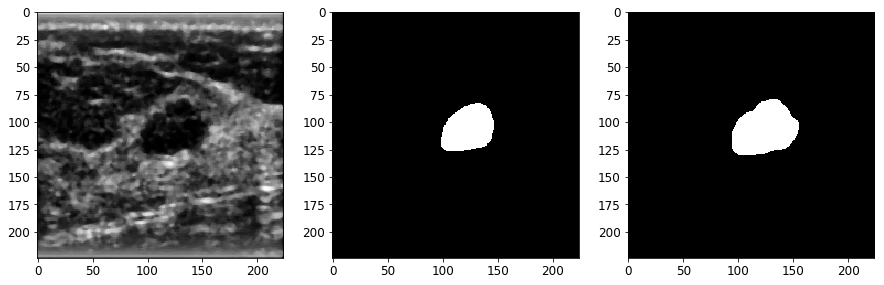

Dice score: 0.833


In [6]:
plt.figure()

plt.subplot(131)
plt.imshow(np.round(img.squeeze()), cmap='gray')

plt.subplot(132)
plt.imshow(roi, cmap='gray')

plt.subplot(133)
plt.imshow(roi_predicted, cmap='gray')

plt.show()

print('Dice score:', dice_coef_np(roi_predicted, roi).round(3))